# Lyric Data Analysis

Segregation and Text analysis of the lyric data

In [42]:
# Import the necessary modules
import pandas as pd 
import numpy as np
import re 

import string 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [41]:
# Constants 
STOPWORDS = stopwords.words('english')
STOPWORDS + ['said']

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
# Load the data
df = pd.read_excel('../data/top_decade_songs_translated.xlsx')
df.shape

(70, 26)

In [11]:
df.head()

,track_id,name,album,artist,release_date,length,popularity,key,acousticness,danceability,...,valence,time_signature,mode,playlist_id,year,decade,hindi_lyrics,english_lyrics,language,english_translated_lyrics
0,59HjNZgoziKgAwGOhrKRPJ,Tere Mere Sapne Ab Ek Rang Hain,Guide,S. D. Burman,12/6/1965,0.000261,47,3,0.978,0.246,...,0.552,3,1,37i9dQZF1DXa1eCiO3E6Rr,1965,1960,तेरे मेरे सपने\nअब्ब एक रंग हैं\nजहां भी ले जा...,Tere mere sapne\nAbb ek rang hain\nJaha bhee l...,hi,Yours is my dream\nAbb is a color\nWherever yo...
1,1P278K5LuPJOatR1wBUywC,Aane Se Uske Aaye Bahar,Jeene Ki Raah,Laxmikant Pyarelal,1/1/1969,0.000248,51,6,0.886,0.370,...,0.668,4,0,3dKv6gpADy34FI6rcP7DAT,1969,1960,आने से उस के आये बहार\nजाने से उस के जाए बहार\...,Aane se us ke aaye bahar\nJaane se us ke jaaye...,hi,"From his coming, he came out.\nGo out of it.\n..."
2,7ukboFFuDuxKWRdxahmth7,Beqarar Karke Hamen Yun Na Jaiye,Bees Saal Baad,Hemant Kumar,1/1/1962,0.000190,51,10,0.971,0.653,...,0.757,4,0,3dKv6gpADy34FI6rcP7DAT,1962,1960,बेक़रार करके हमें यूँ न जाइये\nआपको हमारी कसम ल...,Beqaraar karake hame yun na jaaiye\nAapako ham...,hi,Don't let us go like that.\nI swear to you bac...
3,6xCnMMPkIIhn3QyGJgd5xd,Ae Mere Zohra Jabeen,Waqt,Ravi,7/28/1965,0.000235,52,6,0.984,0.441,...,0.514,3,0,3dKv6gpADy34FI6rcP7DAT,1965,1960,ऐ मेरी जोहरा जबीं\nतुझे मालुम नहीं\nतू अभी तक ...,Ai meri zoharaa zabi\nTujhe maalum nahi\nTu ab...,hi,O my zohra jabeen\nYou don't know\nYou're stil...
4,1AlatlIkROgLvG6pgBBnAz,Roop Tera Mastana,Aradhana,S. D. Burman,9/27/1969,0.000225,55,8,0.666,0.449,...,0.543,4,0,3dKv6gpADy34FI6rcP7DAT,1969,1960,रूप तेरा मस्ताना\nरूप तेरा मस्ताना\nभूल कोई हम...,"Rup teraa mastaanaa, pyaar meraa divaanaa\nRup...",hi,form your mastana\nform your mastana\nLet no o...


In [12]:
## Add word count to each song 
df['word_count'] = df['english_translated_lyrics'].apply(lambda x: len(x.split()))

In [13]:
# Average number of words per song in in every decade 
df.groupby('decade')['word_count'].mean()

decade
1960    193.5
1970    191.9
1980    209.8
1990    250.9
2000    264.2
2010    189.7
2020    235.5
Name: word_count, dtype: float64

<AxesSubplot:title={'center':'Average Number of song words per decade'}, xlabel='Decade', ylabel='Average number of words'>

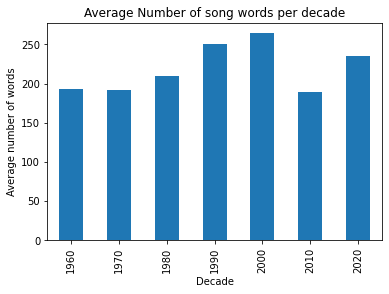

In [38]:
# Plot the number of words bar graph 
df.groupby('decade')['word_count'].mean().plot.bar(title='Average Number of song words per decade', xlabel='Decade', ylabel='Average number of words')

In [45]:
# Summarize the features of the songs for each decade 
df.groupby('decade')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
1960,10.0,0.4247,0.109194,0.246,0.37125,0.4265,0.4470,0.653
1970,10.0,0.4701,0.112558,0.295,0.38775,0.4990,0.5270,0.658
1980,10.0,0.4608,0.090282,0.354,0.37775,0.4565,0.5265,0.611
1990,10.0,0.5855,0.143082,0.364,0.47200,0.5920,0.6850,0.786
2000,10.0,0.6422,0.139289,0.382,0.57225,0.6905,0.7015,0.829
2010,10.0,0.5337,0.094966,0.370,0.47775,0.5480,0.5850,0.696
2020,10.0,0.6658,0.134662,0.400,0.57075,0.7220,0.7410,0.857


In [14]:
# Collect the decade wise lyrics 
decade_lyrics = pd.DataFrame(df.groupby('decade', as_index=False).english_translated_lyrics.apply(lambda x: ' '.join(x)))
decade_lyrics

,decade,english_translated_lyrics
0,1960,Yours is my dream\nAbb is a color\nWherever yo...
1,1970,I'm not a shayar\nBut hey laughed.\nEver since...
2,1980,Janu my life\nI am your sacrifice\nJanu my lif...
3,1990,even if you say nothing\nI listened to...\ncho...
4,2000,Aa aa.. Come on... Aa aa.. Aa aa.. The second ...
5,2010,I am this Sahib ji\nLet's go all the g\nStill ...
6,2020,"When you walk the way, you turn the way\nWhen ..."


In [25]:
# Collect the decade wise lyrics 
decade_lyrics = pd.DataFrame(df.groupby('decade', as_index=False).english_translated_lyrics.apply(lambda x: ' '.join(x)))
decade_lyrics

,decade,english_translated_lyrics
0,1960,Yours is my dream\nAbb is a color\nWherever yo...
1,1970,I'm not a shayar\nBut hey laughed.\nEver since...
2,1980,Janu my life\nI am your sacrifice\nJanu my lif...
3,1990,even if you say nothing\nI listened to...\ncho...
4,2000,Aa aa.. Come on... Aa aa.. Aa aa.. The second ...
5,2010,I am this Sahib ji\nLet's go all the g\nStill ...
6,2020,"When you walk the way, you turn the way\nWhen ..."


In [26]:
# Save the data 
decade_lyrics.to_csv('../data/lyrics_by_decade.csv', index=False)

In [27]:
# Create text files for decade-wise lyrics 
for i in range(len(decade_lyrics)):
    with open(f"../data/lyrics/lyrics_from_{decade_lyrics['decade'][i]}.txt", 'w', encoding="utf-8") as f:
        f.write(decade_lyrics.iloc[i, 1])

In [23]:
df['decade'].value_counts()

1960    10
1970    10
1980    10
1990    10
2000    10
2010    10
2020    10
Name: decade, dtype: int64

In [35]:
# Print the top songs from each decade 
for i in range(len(decade_lyrics)):
    print(f"Top songs from {decade_lyrics['decade'][i]}:")
    song_list = df[df['decade'] == decade_lyrics['decade'][i]].sort_values('popularity', ascending=False).head(10)['name'].values
    for j in range(len(song_list)):
        print(f"{song_list[j]}")
    print("\n")

Top songs from 1960:
Likhe Jo Khat Tujhe
Abhi Na Jao Chhod Kar
Roop Tera Mastana
Ae Mere Zohra Jabeen
Aane Se Uske Aaye Bahar
Beqarar Karke Hamen Yun Na Jaiye
Tum Agar Saath Dene Ka Vada Karo
Isharon Isharon Men Dil Lenewale
Tere Mere Sapne Ab Ek Rang Hain
Aap Ki Nazron Ne Samjha


Top songs from 1970:
Kya Khoob Lagti Ho
Yunhi Tum Mujhse - From Sachaa Jhutha
Kehdoon Tumhen - Deewaar / Soundtrack Version
Kabhi Kabhi Mere Dil Mein - Duet
Main Pal Do Pal Ka Shair Hoon
Main Shair To Nahin
Mehbooba Mehbooba - From “Sholay Songs And Dialogues, Vol. 2” Soundtrack
Kahin Door Jab Din Dhal Jaye
Kabhi Kabhi Mere Dil Mein
Zindagi Kaisi Hai Paheli


Top songs from 1980:
Neele Neele Ambar Par - Male Version
Ae Mere Humsafar
Dekha Ek Khwab
Main Duniya Bhula Doonga
Tum Ko Dekha To Yeh Khayal Aaya
Dheere Dheere Se Meri Zindagi Mein Aana
Tujhse Naraz Nahin Zindagi - Lata Mangeshkar
Janu Meri Jaan - Shaan / Soundtrack Version
Jaan - E - Jigar Jaaneman
Tera Naam Liya


Top songs from 1990:
Yeh Haseen Vadi

## Lyrics Text Analysis

In [ ]:
# Create a function to clean the data 
def clean_data(text): 
    """Create a function to clean the text by removing stopwords

    Args:
        text (str): A text to be cleaned. 
    """

    # Lower case 
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d', '', text)

    # Replace \n and \t functions 
    text = re.sub(r'\n', '', text)
    text = text.strip()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove Stopwords and Lemmatise the data
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS]
    text = ' '.join(text)

    return text

In [ ]:
# Calculate the repetitiveness of songs 
